# The Goal here is to Learn to Separate Audio in a Efficient Way

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Imports
import math
import librosa
import librosa.display
import IPython.display as ipd

import pyAudioAnalysis
import pydub
import ffmpeg

import os

import matplotlib.pyplot as plt
from numpy import sin, cos, pi, linspace, arange, log10, absolute, where
from numpy.random import randn
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter, freqz, welch
from scipy.io.wavfile import read , write
from scipy.signal import spectrogram
from matplotlib import pyplot
from matplotlib.pyplot import ylabel, xlabel
from matplotlib.pyplot import plot, legend, show, grid, figure, savefig#, hold

In [92]:
filename = 'audio/training2/A_casa_01.wav'

fs, audio1 = read(filename)
f,t,S1 = spectrogram(audio1, fs, window='flattop', nperseg=fs//10, noverlap=fs//20, scaling='spectrum', mode='magnitude')
print('filename: ', filename)
print('Data Length (s): ',t[-1])
print('Sampling frequency (samples/s): ', fs)

#Playing Audio (Reproduce Audio)
ipd.Audio(filename)

filename:  audio/training2/A_casa_01.wav
Data Length (s):  1.2
Sampling frequency (samples/s):  44100


Text(0, 0.5, 'frequency(Hz)')

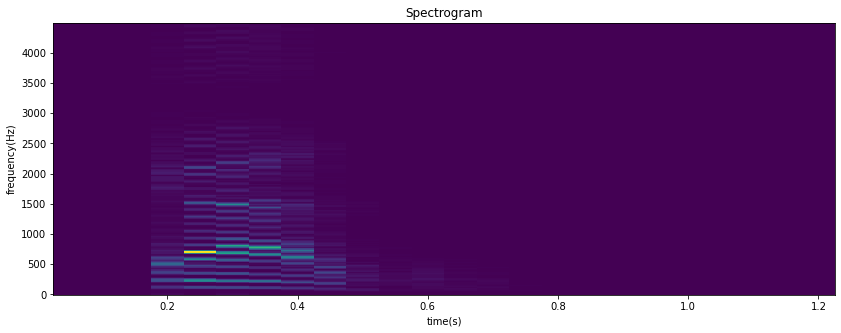

In [93]:
#Spectogram
pyplot.rcParams['figure.figsize'] = 14,5
pyplot.pcolormesh(t, f[:450], S1[:450][:])
pyplot.title("Spectrogram")
xlabel('time(s)')
ylabel('frequency(Hz)')
#show()

In [94]:
#Filtro ButterWord

wn = 1500/(fs/2)
b3,a3 = butter(4, wn)
audio1_filt = lfilter(b3,a3,audio1)

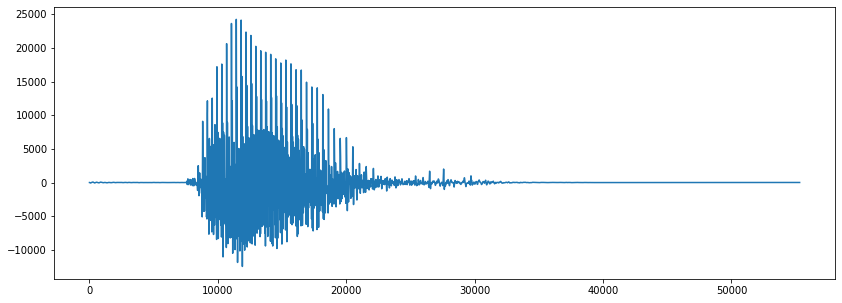

In [101]:
plot(audio1_filt)

In [111]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.playback import play 

#Analyze Audio (With audio Segment)
song = AudioSegment.from_wav(filename)

#Divide Audio in two (The old Way)
db = -10
segments = split_on_silence(song, min_silence_len = 100, silence_thresh = db)
while len(segments) != 2:
    db = db-1
    segments = split_on_silence(song, min_silence_len = 100, silence_thresh = db)
        
# Process each chunk with your parameters
for i, segment in enumerate(segments):

    # Export the audio chunk with new bitrate.
    print("Exporting chunk{0}.wav.".format(i))
    segment.export(
        "audio/WD_data/chunk{0}.wav".format(i),
        bitrate = "192k",
        format = "wav"
    )

wav_file = AudioSegment.from_file(file = "audio/WD_data/chunk0.wav", 
                                  format = "wav")     
    
# Play the audio file
play(segments)

Exporting chunk0.wav.
Exporting chunk1.wav.


AttributeError: 'list' object has no attribute 'export'

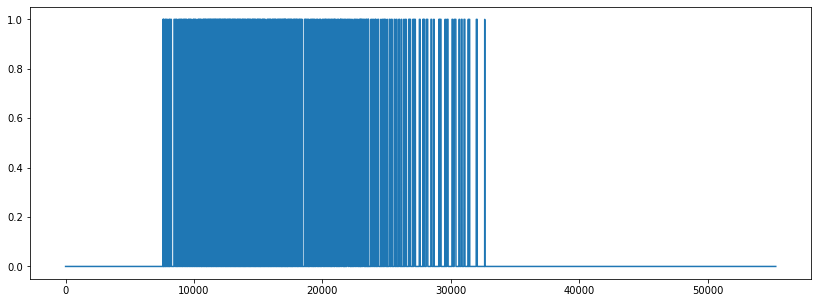

In [103]:

#results = [1 if item > 0.001*1e8 else 0 for item in audio1_filt**2]
results = [1 if item > 100 else 0 for item in audio1_filt]
plot(results)

x1: 2
x2: 8
x3: 12
x4: 14


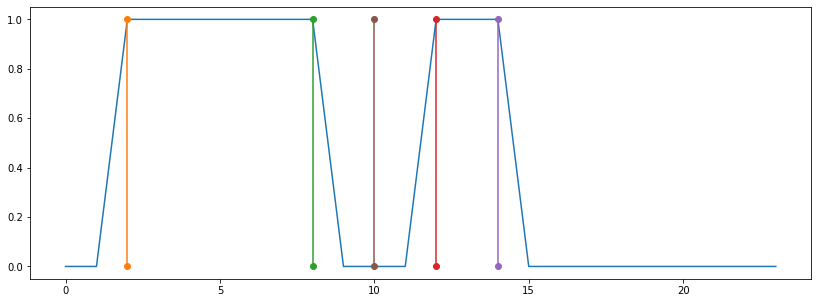

In [84]:
import numpy

x1 = 0
x2 = 0
x3 = 0
x4 = 0
flag = False
zeros_list = []
silence_len = 1000
change_len = 2000
for i, result in enumerate(results):
    if(flag == False and result == 1):
        if (x1 == 0):
            flag = True
            x1 = i
        elif (i != x1):
            flag = True
            x3 = i
    if(flag == True):
        if(result == 0):
            zeros_list.append(result)
        else:
            zeros_list = []
    if(flag == True and len(zeros_list) >= silence_len):
        if (x2 == 0):
            flag = False
            x2 = i - len(zeros_list)
            if(x2-x1 <= change_len):
                x1 = x2 = 0
        elif (i - len(zeros_list) != x2):
            flag = False
            x4 = i - len(zeros_list)
            break
            
Div_p = ((x3-x2)/2)+x2
        
print(f'x1: {x1}')
print(f'x2: {x2}')
print(f'x3: {x3}')
print(f'x4: {x4}')

plot(results)

line1 = [x1, x1], [0, 1]
line2 = [x2, x2], [0, 1]
line3 = [x3, x3], [0, 1]
line4 = [x4, x4], [0, 1]
plot(line1[0], line1[1], line2[0], line2[1], line3[0], line3[1], line4[0], line4[1], marker='o')

line5 = [Div_p, Div_p], [0, 1]
plot(line5[0],line5[1], marker='o')

#plt.savefig('pics/N_cata_02.jpeg')


# Second Possibility (Loop)

In [3]:
filename = 'audio/training2/J_cata_02.wav'

#List of Words
words = ["_chata_0","_chapa_0","_chave_0","_lata_0","_lapa_0","_lava_0","_casa_0","_capa_0","_cave_0","_cata_0","_chuta_0","_chupa_0","_chuva_0","_farta_0","_farpa_0","_farda_0","_ripa_0","_rita_0","_rica_0"]

#List of Dataset versions
d = {"one": 1, "two": 2}
iterable = d.keys()

#List of people
p = ['A','J','N']

#If you want to change Directory
#os.chdir(r'pythonProject\commonModule\')



In [116]:
segments = []
Process_Select = False # False for audio save / True for picture save

for y in words:
    for item in iterable:      
        for x in p:
            check = x #For Validation

            #Write file path
            l = str(d[item])

            filename = 'audio/training/'+x+y+l+'.wav' #for Training DataSet
            #filename = 'audio/test/'+x+y+l+'.wav' #for Test DataSet


            #Read file path
            fs, audio1 = read(filename)
            f,t,S1 = spectrogram(audio1, fs, window='flattop', nperseg=fs//10, noverlap=fs//20, scaling='spectrum', mode='magnitude')

            #Apply butterworth Filter
            wn = 1500/(fs/2)
            b3,a3 = butter(4, wn)
            audio1_filt = lfilter(b3,a3,audio1)
            
            #Calculate Results
            #results = [1 if item > 0.001*1e8 else 0 for item in audio1_filt**2] (Old Attempt)
            results = [1 if item > 350 else 0 for item in audio1_filt] #350
            
            #Calculate limits
            x1 = 0
            x2 = 0
            x3 = 0
            x4 = 0
            flag = False
            zeros_list = []
            silence_len = 7500 #6000
            change_len = 2000
            for i, result in enumerate(results):
                if(flag == False and result == 1):
                    if (x1 == 0):
                        flag = True
                        x1 = i
                    elif (i != x1):
                        flag = True
                        x3 = i
                if(flag == True):
                    if(result == 0):
                        zeros_list.append(result)
                    else:
                        zeros_list = []
                if(flag == True and len(zeros_list) >= silence_len):
                    if (x2 == 0):
                        flag = False
                        x2 = i - len(zeros_list)
                        if(x2-x1 <= change_len):
                            x1 = x2 = 0
                    elif (i - len(zeros_list) != x2):
                        flag = False
                        x4 = i - len(zeros_list)
                        break

            Div_p = round(((x3-x2)/2)+x2)
                            
            if (Process_Select == True):
                plot(results)
                line1 = [x1, x1], [0, 1]
                line2 = [x2, x2], [0, 1]
                line3 = [x3, x3], [0, 1]
                line4 = [x4, x4], [0, 1]
                plot(line1[0], line1[1], line2[0], line2[1], line3[0], line3[1], line4[0], line4[1], marker='o')

                line5 = [Div_p, Div_p], [0, 1]
                plot(line5[0],line5[1], marker='o')
                plt.savefig('Word Detection/crop_pics/'+x+y+l+'.jpeg')
                plt.close()
                plt.cla()
                plt.clf()
            else:
                # Fix-sized segmentation (breaks a signal into non-overlapping segments)
                signal = audio1 / (2**15)
                signal_len = len(signal)
                segment_size_t = 1 # segment size in seconds
                segment_size = segment_size_t * fs  # segment size in samples

                # Break signal into list of segments in a single-line Python code
                segment1 = audio1[:Div_p]
                segment2 = audio1[Div_p:]
                segments = [segment1, segment2]

                #Find out the number of Segments
                n = len(segments)


                # Process each chunk with your parameters
                # Save each segment in a seperate filename
                for iS, s in enumerate(segments):
                    write('audio/PD_data/'+x+y+l+'_{0:d}.wav'.format(segment_size_t * iS, segment_size_t * (iS + 1)), fs, (s))







# Power Spectrum Analysis

Save all spectograms into a folder

In [8]:
for y in words:
    for item in iterable:      
        for x in p:
            check = x #For Validation

            #Write file path
            l = str(d[item])

            filename = 'audio/training2/'+x+y+l+'.wav' #for Training DataSet
            #filename = 'audio/test/'+x+y+l+'.wav' #for Test DataSet


            #Read file path
            fs, audio1 = read(filename)
            f,t,S1 = spectrogram(audio1, fs, window='flattop', nperseg=fs//10, noverlap=fs//20, scaling='spectrum', mode='magnitude')

            #Spectogram
            pyplot.rcParams['figure.figsize'] = 14,5
            pyplot.pcolormesh(t, f[:450], S1[:450][:])
            pyplot.title("Spectrogram")
            xlabel('time(s)')
            ylabel('frequency(Hz)')
            plt.savefig('Word Detection/spect_pics/'+x+y+l+'.jpeg')
            plt.close()
            plt.cla()
            plt.clf()
            








<Figure size 1008x360 with 0 Axes>